# Sleep Disorder Analysis

# Task 1: Exploratory Data Analysis

In [ ]:
import pandas as pd

url = 'https://drive.google.com/file/d/1dcazkWEaKQJeH8SmTtnxZgeB3fBf3htM/view?usp=drive_link'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

# loaded up df
df = pd.read_csv(path)
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [ ]:
#cleaning data
#converting Blood Pressure to Mean Blood Pressure for better visualization
print(df["Blood Pressure"].unique())
def meanBloodPressure(x):
  split = x.split("/")
  systolic = int(split[0])
  diastolic = int(split[1])
  return int((diastolic + ((systolic-diastolic)/3)))
df["Blood Pressure"] = df["Blood Pressure"].apply(meanBloodPressure)
df.rename(columns={"Blood Pressure": "Mean Blood Pressure"}, inplace = True)

# Since BMI Category has values "Normal" and "Normal Weight" setting all "Normal Weight" values to just "Normal"
df['BMI Category'] = df['BMI Category'].replace({'Normal Weight':'Normal'})

['126/83' '125/80' '140/90' '120/80' '132/87' '130/86' '117/76' '118/76'
 '128/85' '131/86' '128/84' '115/75' '135/88' '129/84' '130/85' '115/78'
 '119/77' '121/79' '125/82' '135/90' '122/80' '142/92' '140/95' '139/91'
 '118/75']


In [ ]:
# df information
print("INFO:")
print(df.info())
print("\nDESCRIBE:")
print(df.describe())
# Sleep duration is in hours
# Quality of sleep is a subjective rating out of 10
# Physical Activity Level is in minutes per day
# Stress level is a subjective rating out of 10

INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Mean Blood Pressure      374 non-null    int64  
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(8), object(4)
memory usage: 38.1+ KB
None

DESCRIBE:


Text(0.5, 1.0, 'Sleep Disorder Counts')

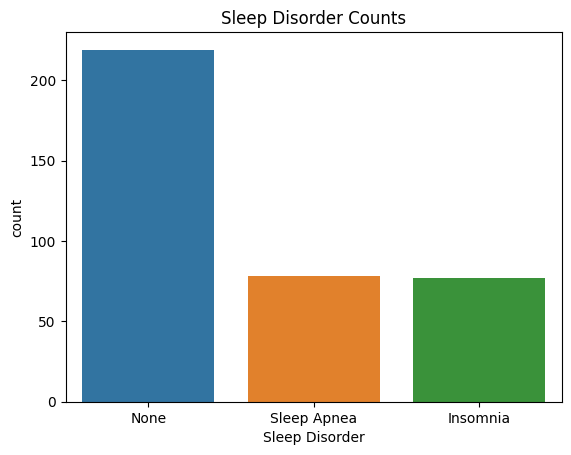

In [ ]:
# Count plot of our target
import seaborn as sns
sns.countplot(x='Sleep Disorder',data=df).set_title("Sleep Disorder Counts")

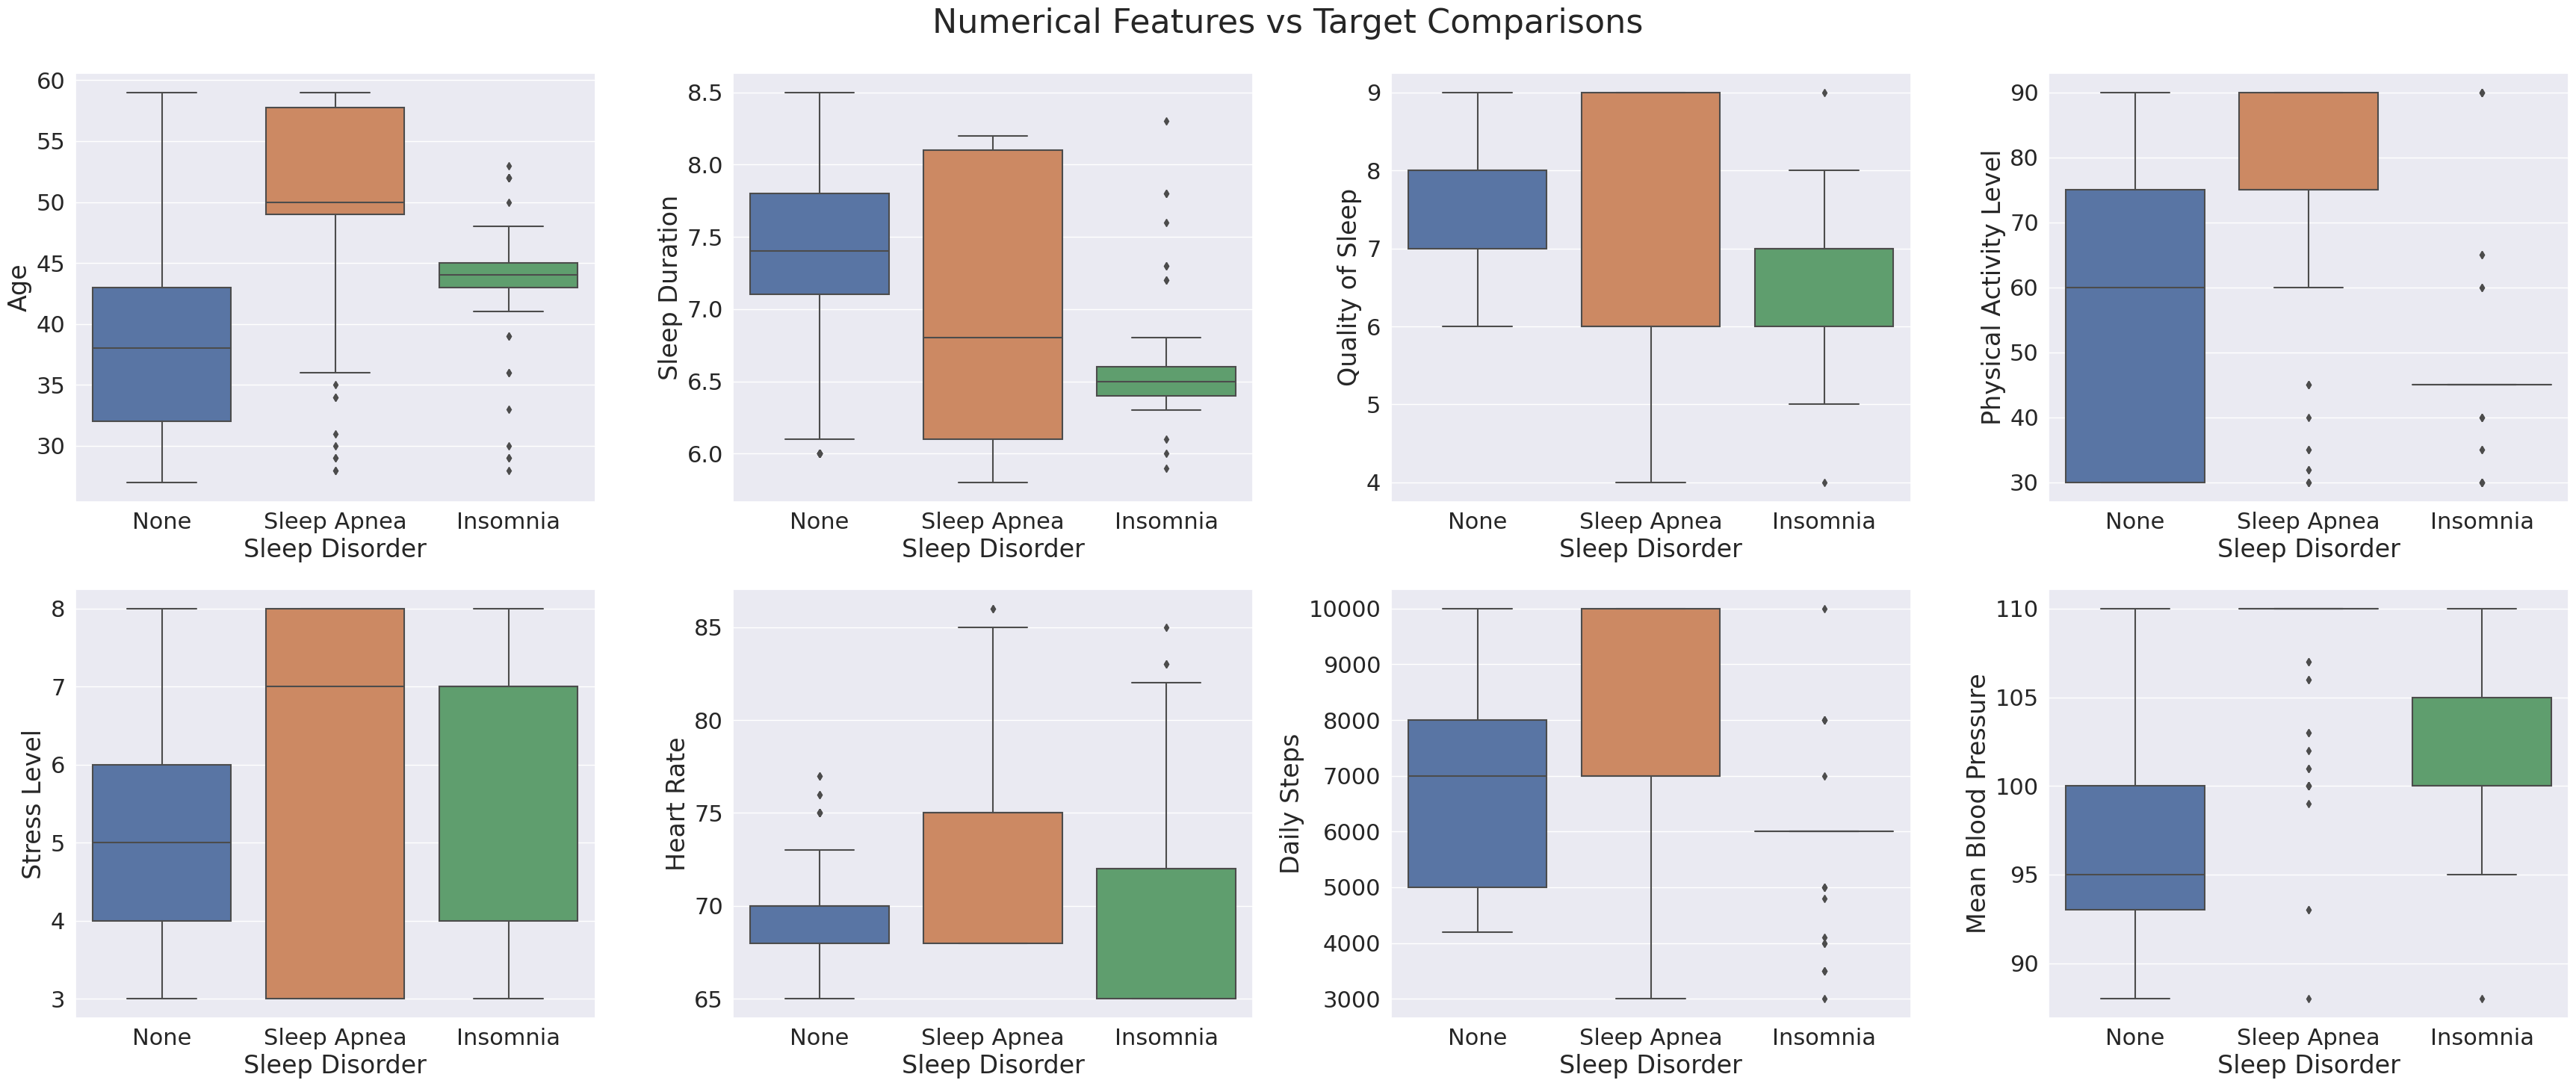

In [ ]:
# Box plots comparing numerical features with our target
import matplotlib.pyplot as plt
sns.set(font_scale=2)
num_cols=["Age","Sleep Duration", "Quality of Sleep", "Physical Activity Level", "Stress Level", "Heart Rate", "Daily Steps","Mean Blood Pressure"]
fig, ax = plt.subplots(nrows=2, ncols=4,figsize=(35,15))
count = 0
i = 0
j = 0
while count < len(num_cols):
  if count == 4:
    i+=1
    j=0
  sns.boxplot(x="Sleep Disorder", y=num_cols[count],data=df,ax=ax[i][j])
  j+=1
  count+=1
fig.suptitle("Numerical Features vs Target Comparisons",fontsize=32)
plt.tight_layout()
plt.show()

Male      189
Female    185
Name: Gender, dtype: int64
Normal        216
Overweight    148
Obese          10
Name: BMI Category, dtype: int64
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: Occupation, dtype: int64
None           219
Sleep Apnea     78
Insomnia        77
Name: Sleep Disorder, dtype: int64


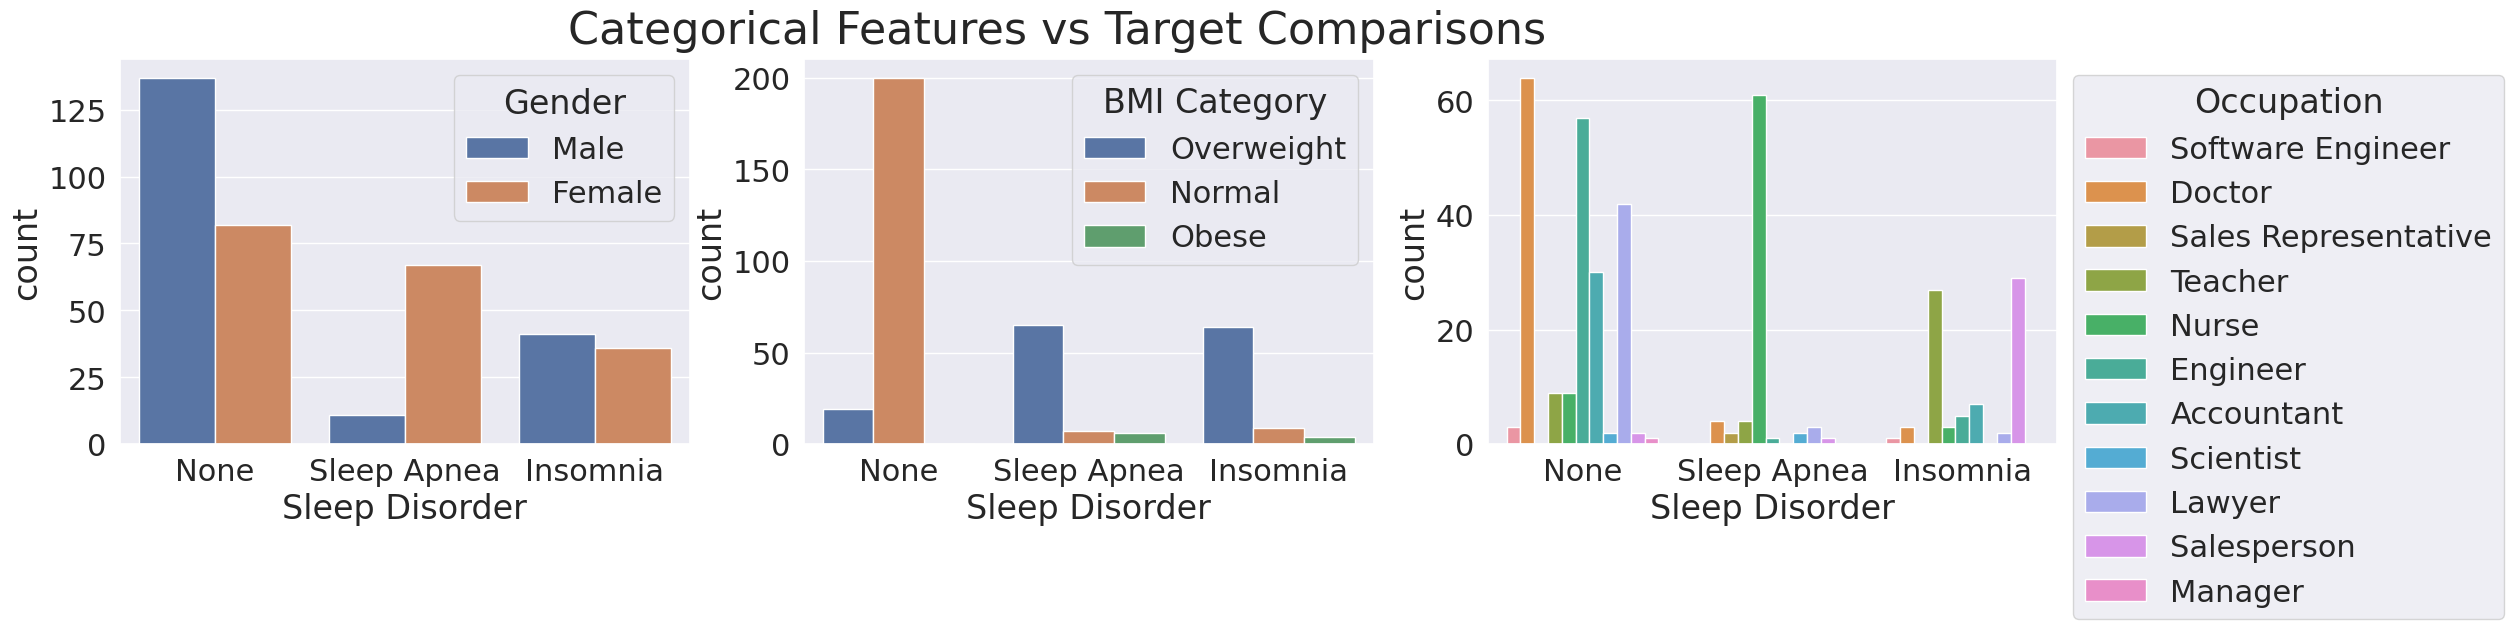

In [ ]:
# Plots comparing categorical features with target
print(df["Gender"].value_counts())
print(df["BMI Category"].value_counts())
print(df["Occupation"].value_counts())
print(df["Sleep Disorder"].value_counts())
sns.set(font_scale=2)
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(25,5))
count = 0
sns.countplot(x='Sleep Disorder',hue="Gender",data=df, ax=ax[0])
sns.countplot(x='Sleep Disorder',hue="BMI Category",data=df, ax=ax[1])
ax = sns.countplot(x='Sleep Disorder',hue="Occupation",data=df)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
fig.suptitle("Categorical Features vs Target Comparisons",fontsize=32)
plt.show()

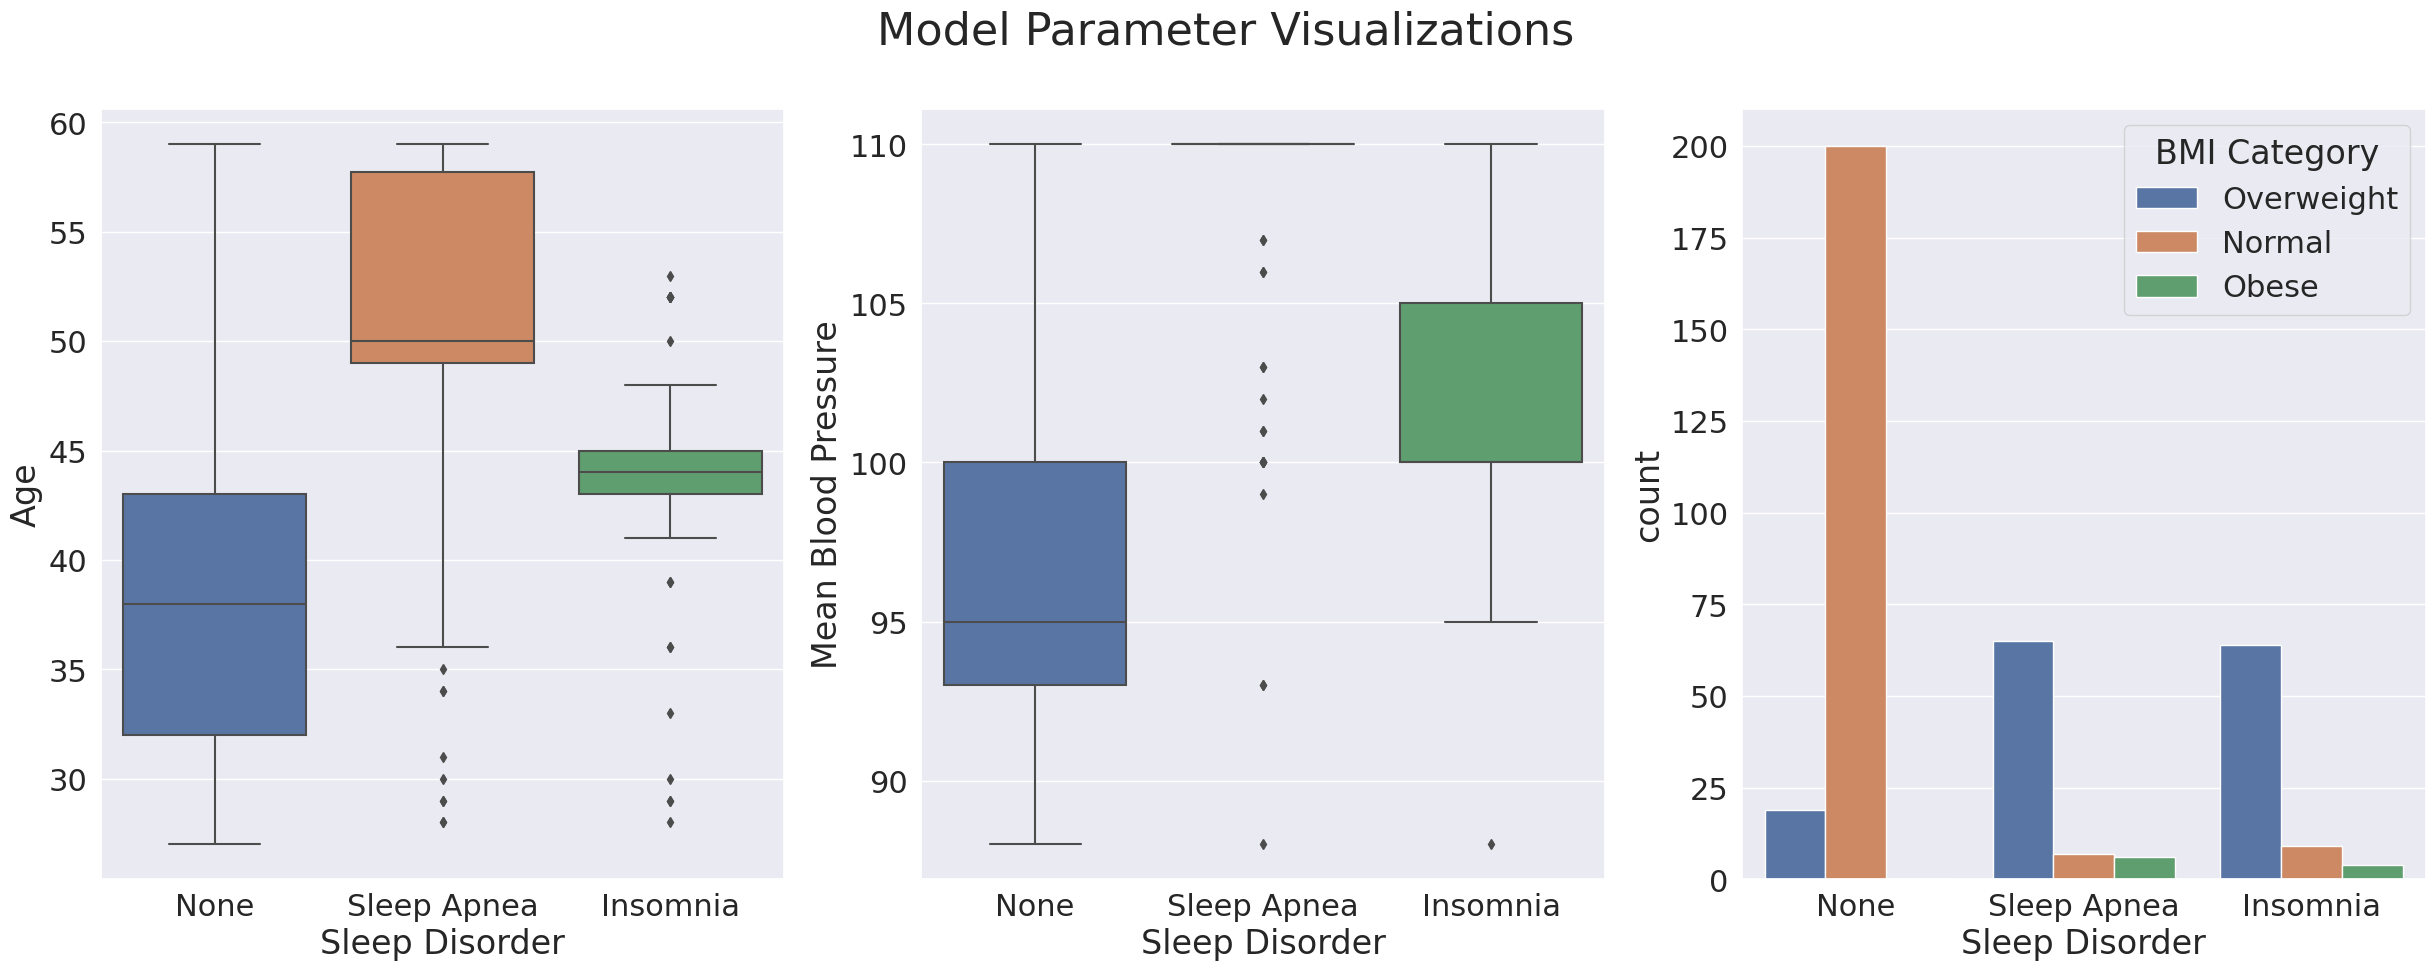

In [ ]:
# Parameters for model: Age, Mean Blood Pressure, BMI Category
# Model target: Sleep Disorder
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(30,10))
count = 0
sns.boxplot(x='Sleep Disorder',y="Age",data=df, ax=ax[0])
sns.boxplot(x='Sleep Disorder',y="Mean Blood Pressure",data=df, ax=ax[1])
ax = sns.countplot(x='Sleep Disorder',hue="BMI Category",data=df, ax=ax[2])
fig.suptitle("Model Parameter Visualizations",fontsize=32)
plt.show()


In [ ]:
# Encoding BMI Category and Sleep Disorder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["encoded_BMI"] = encoder.fit_transform(df['BMI Category'])
df['target']=df['Sleep Disorder'].apply(lambda x: 0 if x=='None' else 1)

# PARAMETERS TO TRAIN WITH: Age, Mean Blood Pressure, Encoded_BMI
# TARGET TO TRAIN WITH: target
# Possible model types: logistic regression, SVM, Decision Tree, K Nearest Neightbors (classification problem)
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Mean Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,encoded_BMI,target
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,97,77,4200,None,2,0
1,2,Male,28,Doctor,6.2,6,60,8,Normal,95,75,10000,None,0,0
2,3,Male,28,Doctor,6.2,6,60,8,Normal,95,75,10000,None,0,0
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,106,85,3000,Sleep Apnea,1,1
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,106,85,3000,Sleep Apnea,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,110,68,7000,Sleep Apnea,2,1
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,110,68,7000,Sleep Apnea,2,1
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,110,68,7000,Sleep Apnea,2,1
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,110,68,7000,Sleep Apnea,2,1


# Task 2: Train Models

In [ ]:
# PARAMETERS TO TRAIN WITH: Age, Mean Blood Pressure, Encoded_BMI
# TARGET TO TRAIN WITH: target
from sklearn.model_selection import train_test_split

X = df[['Age', 'Mean Blood Pressure', 'encoded_BMI']]
Y = df['target']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# Model type: logistic regression (classification)
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, Y_train)

LogisticRegression(random_state=42)

In [ ]:
print(lr_model.intercept_, lr_model.coef_)

[-23.60723731] [[-0.05292217  0.24141493  1.45091006]]


In [ ]:
# Model type: Decision Tree (classification)
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier()

# Task 3: Test and Evaluate
### Logistic Regression Evaluation

In [ ]:
# Testing & Evaluation is done with accuracy test, confusion matrix and F1 Score
from sklearn.metrics import accuracy_score

Y_predict_reg = lr_model.predict(X_test)
reg_accuracy = accuracy_score(Y_test, Y_predict_reg)
print("Accuracy:", reg_accuracy) # pretty good result, good dataset.

Accuracy: 0.92


Text(0.5, 1.0, 'Confusion Matrix')

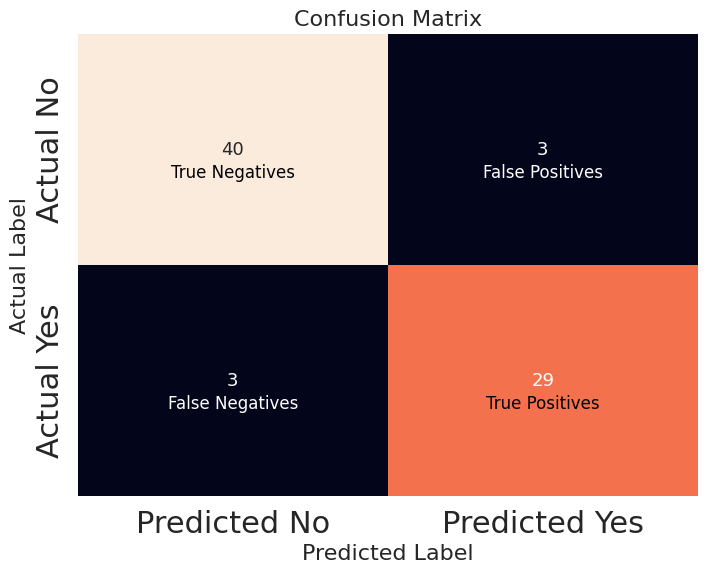

In [ ]:
from sklearn.metrics import confusion_matrix
c_matrix = confusion_matrix(Y_test, Y_predict_reg)

plt.figure(figsize=(8,6))
sns.heatmap(c_matrix, annot=True, fmt="d", xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'], cbar=False, annot_kws={"size": 13})

plt.text(0.5, 0.6, 'True Negatives', ha='center', va='center', color='black', fontsize=12)
plt.text(1.5, 1.6, 'True Positives', ha='center', va='center', color='black', fontsize=12)
plt.text(1.5, 0.6, 'False Positives', ha='center', va='center', color='white', fontsize=12)
plt.text(0.5, 1.6, 'False Negatives', ha='center', va='center', color='white', fontsize=12)

plt.xlabel("Predicted Label", fontsize=16)
plt.ylabel("Actual Label", fontsize=16)
plt.title("Confusion Matrix", fontsize=16)

# very little false negative and false positives

In [ ]:
from sklearn.metrics import f1_score
reg_f1 = f1_score(Y_test, Y_predict_reg)
print("F1 Score:", reg_f1)

F1 Score: 0.90625


### Decision Tree Evaluation

In [ ]:
# Testing & Evaluation on Decision Tree is done with accuracy test, confusion matrix and a classification report on precision, recall and f1-score
Y_predict_tree = dt_model.predict(X_test)
tree_accuracy = accuracy_score(Y_test, Y_predict_tree)
print("Accuracy:", tree_accuracy) # the classifier is correct 96% of the time, very accurate.

Accuracy: 0.96


Text(0.5, 1.0, 'Confusion Matrix')

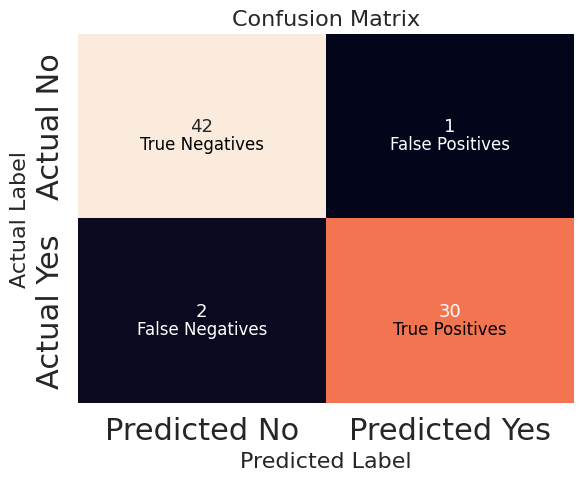

In [ ]:
from sklearn.metrics import confusion_matrix

c_matrix = confusion_matrix(Y_test, Y_predict_tree)

sns.heatmap(c_matrix, annot=True, fmt="d", xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'], cbar=False, annot_kws={"size": 13})

plt.text(0.5, 0.6, 'True Negatives', ha='center', va='center', color='black', fontsize=12)
plt.text(1.5, 1.6, 'True Positives', ha='center', va='center', color='black', fontsize=12)
plt.text(1.5, 0.6, 'False Positives', ha='center', va='center', color='white', fontsize=12)
plt.text(0.5, 1.6, 'False Negatives', ha='center', va='center', color='white', fontsize=12)

plt.xlabel("Predicted Label", fontsize=16)
plt.ylabel("Actual Label", fontsize=16)
plt.title("Confusion Matrix", fontsize=16)

# similar to logistic regression, shows consistancy in the model

In [ ]:
tree_f1 = f1_score(Y_test, Y_predict_tree)
print("F1 Score:", tree_f1)

F1 Score: 0.9523809523809523


# Task 4: Make Comparison

In [ ]:
# Comparison of Logistic Regression and Decision Tree models

# Logistic Regression Evaluation
from sklearn.metrics import classification_report

print("Logistic Regression Evaluation:")
print("Accuracy:", reg_accuracy)
print("F1 Score:", reg_f1)
print(classification_report(Y_test, Y_predict_reg))  # Classification report for precision, recall, and f1-score

# Decision Tree Evaluation
print("\nDecision Tree Evaluation:")
print("Accuracy:", tree_accuracy)
print("F1 Score:", tree_f1)
print(classification_report(Y_test, Y_predict_tree))  # Classification report for precision, recall, and f1-score

# Both models perform well when it comes to predicting sleep disorders
# Both models displays high accuracy, precision and recall, and similar F1 scores

Logistic Regression Evaluation:
Accuracy: 0.92
F1 Score: 0.90625
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.91      0.91      0.91        32

    accuracy                           0.92        75
   macro avg       0.92      0.92      0.92        75
weighted avg       0.92      0.92      0.92        75


Decision Tree Evaluation:
Accuracy: 0.96
F1 Score: 0.9523809523809523
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       0.97      0.94      0.95        32

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



**As shown from the report, both models, Logistic Regression and Decision Tree have an accuracy of 0.92 and 0.96 respectively, meaning that both models predict the correct class for approximately 92% and 96% of the instances in the test set**

**Both models have an high f1 score, this indicates that there's a good balance between precision and recall and that both of the models are great at identifying both classes 0 and 1**

**Since both models have a consistently high precision and recall, the ability of the classifiers not to label a sample as positive when it is negative (and vice versa) is high and their ability to find the positive samples is also very high across both models**


**The support column shows the number of occurrences of each class in the test dataset. The balanced representation of both classes indicates that the evaluation is based on a relatively equal number of instances for each class, which helps in assessing the model's performance without a skewed distribution**

**In conclusion, these results showcases that both Logistic Regression and Decision Tree models perform well on this particular test dataset, showcasing high accuracy, F1-score, precision, and recall for the classification task**

In [ ]:
# Concluding which model performs better for each metric...
def get_f1_best(reg_f1, tree_f1):
  f1_scores = {'Logistic Regression': reg_f1, 'Decision Tree': tree_f1}
  best_model = max(f1_scores, key = f1_scores.get)
  return best_model

def get_accuracy_best(reg_accuracy, tree_accuracy):
  acc_scores = {'Logistic Regression': reg_accuracy, 'Decision Tree': tree_accuracy}
  best_accuracy = max(acc_scores, key = acc_scores.get)
  return best_accuracy

# Calls the function and stores the returned value in the variable:
f1_best_model = get_f1_best(reg_f1, tree_f1)
accuracy_best_model = get_accuracy_best(reg_accuracy, tree_accuracy)

print('The best model based on F1 Score is: ', f1_best_model)
print('The best model based on accuracy is: ', accuracy_best_model)

# Out of the two models, the Decision Tree Model performs the best for each metric

The best model based on F1 Score is:  Decision Tree
The best model based on accuracy is:  Decision Tree


# Decision Tree Classifier

In [ ]:
import pydot
from IPython.display import Image
from six import StringIO
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.tree import DecisionTreeClassifier

#This function is needed in order to create images of tree models using pydot
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names

    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    return(graph)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(Y_test, Y_predict_tree))

Accuracy: 0.96


In [ ]:
# Shows the count of each unique value
Y_train.value_counts()
# Class 0 has more occurences/count (176) than class 1 (123)

0    176
1    123
Name: target, dtype: int64

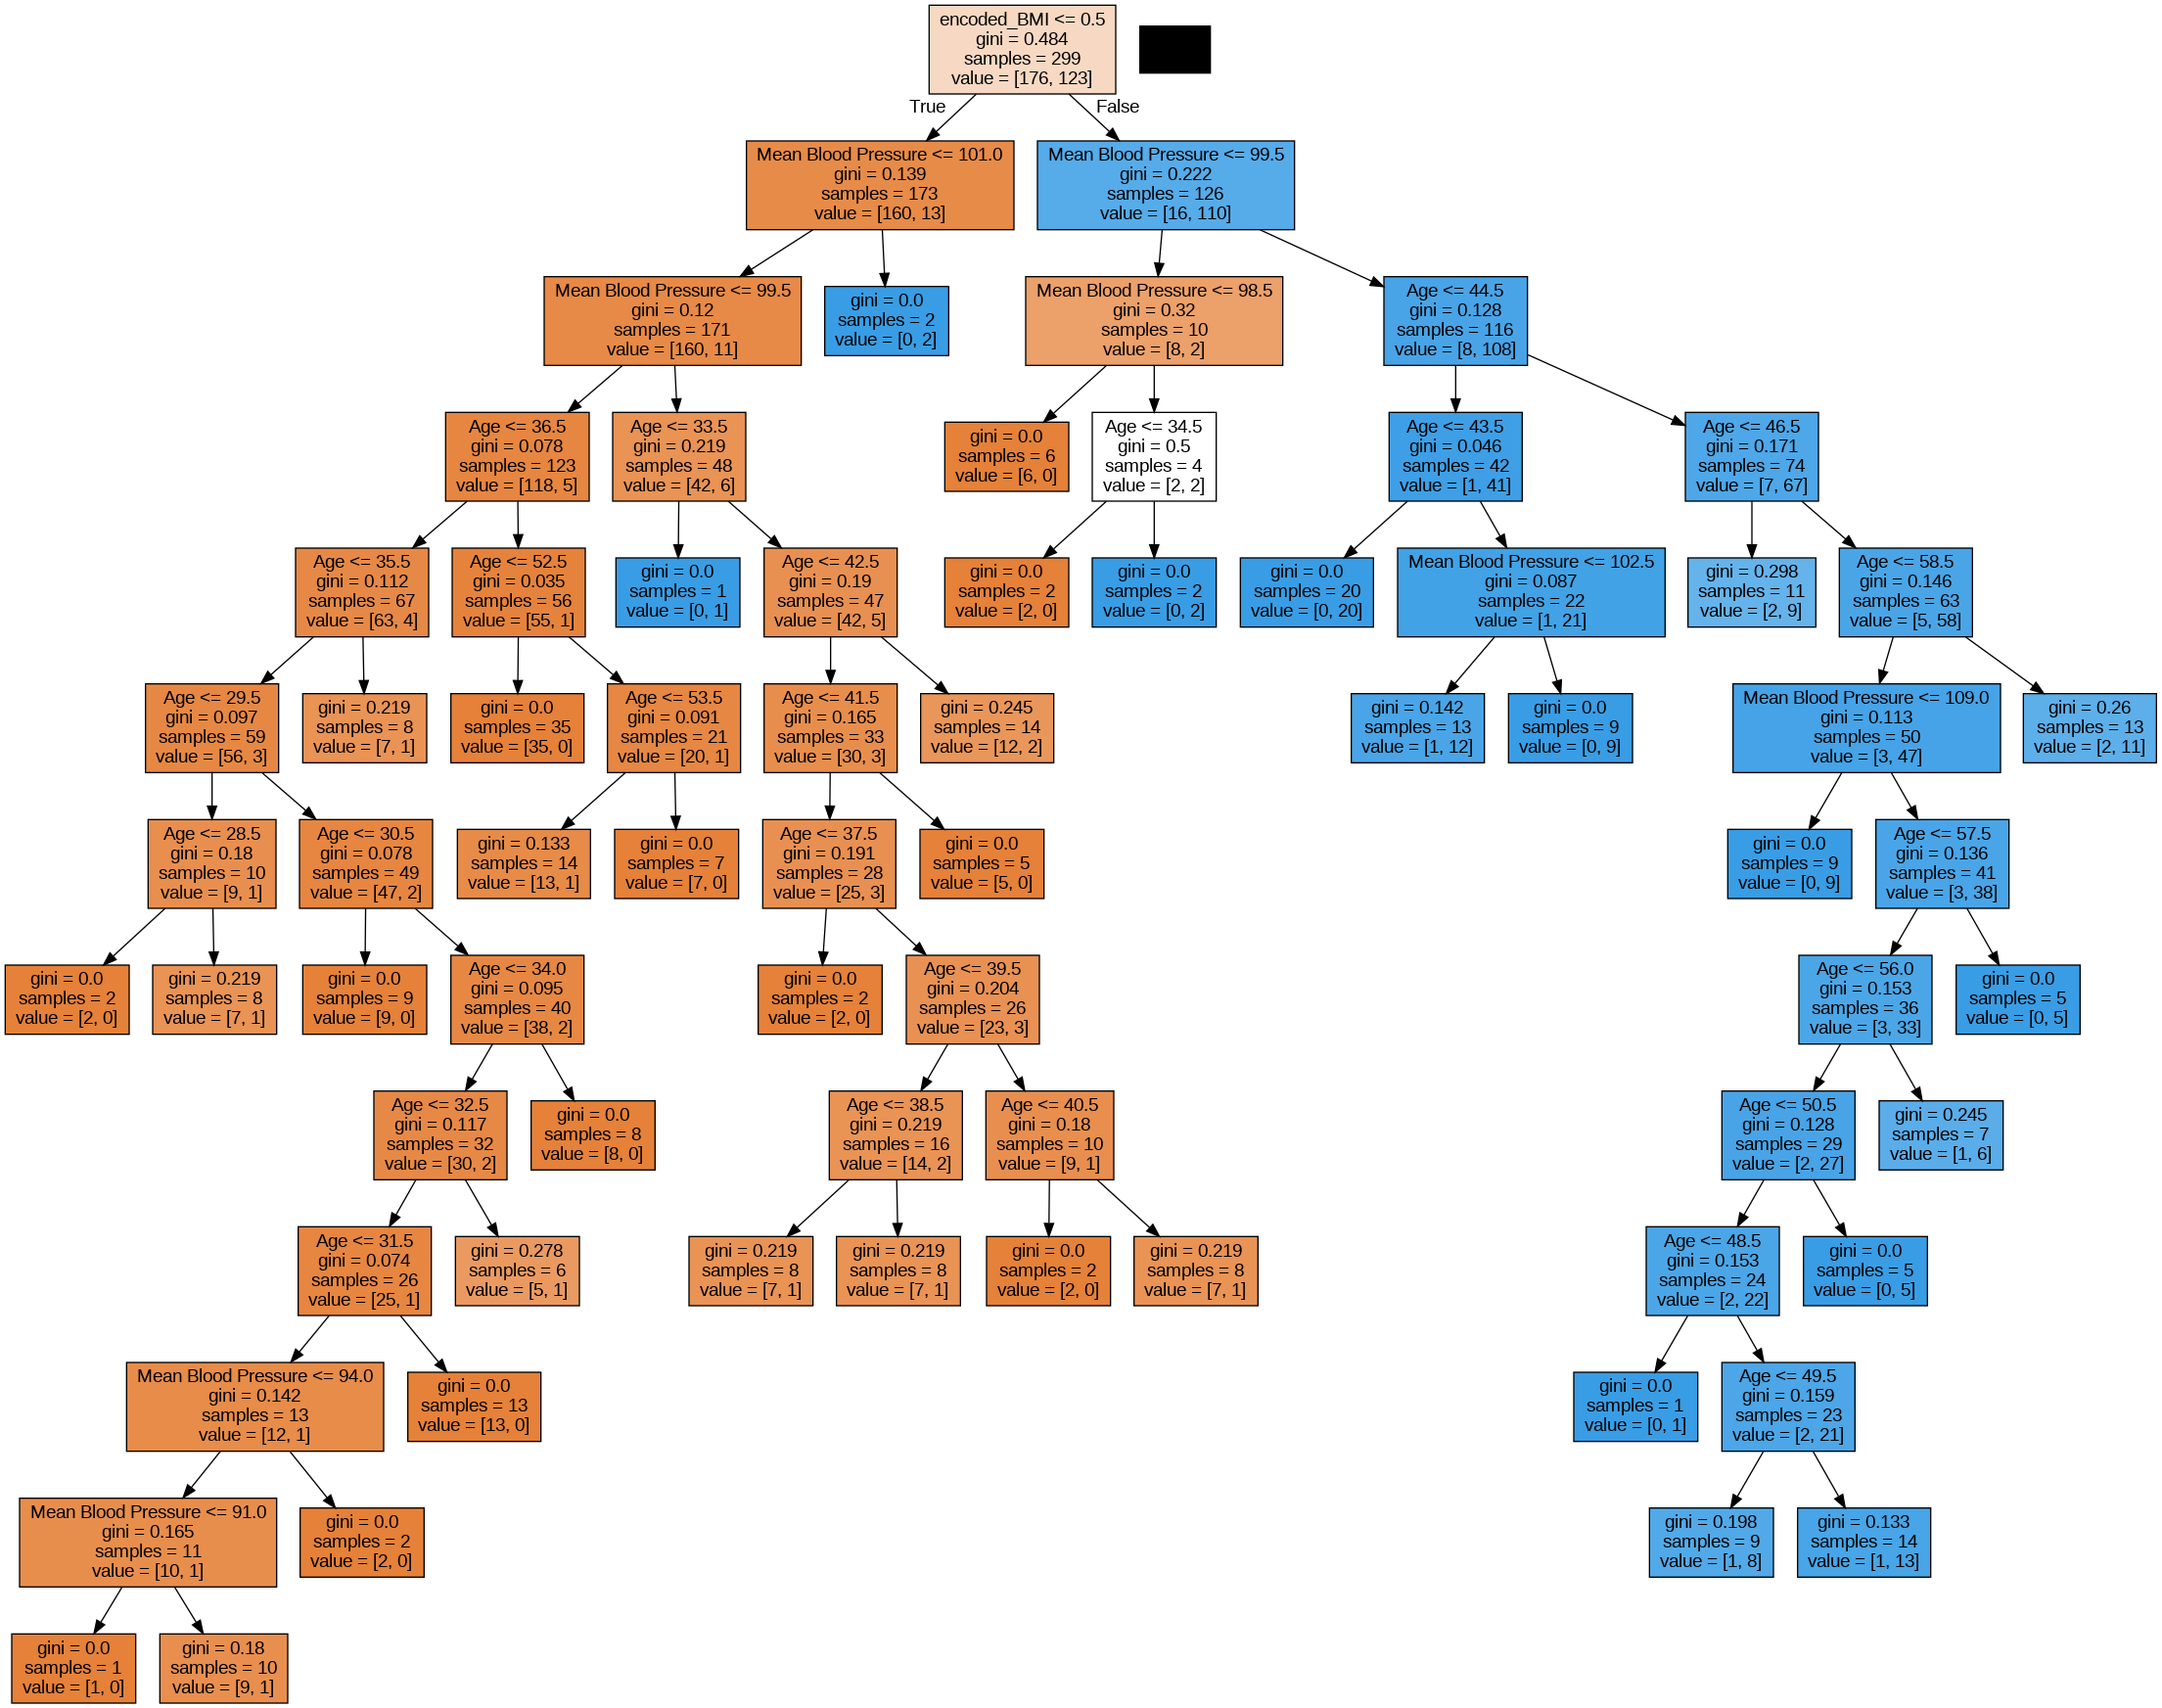

In [ ]:
graph, = print_tree(dt_model, features=X.columns)
Image(graph.create_png())